In [694]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
# data_home = "../data/experiment_2/Experiment2"
# data_home = "../Experiment2_ESarsa_NoExploration"
# data_home = "../Experiment2_NoExploringStarts"
# data_home = "../Experiment2_Non_Introspective"
# data_home = "../data/Experiment2_Introspective_And_Nonintrospective"
data_home = "../data/Experiment2_Introspective"

"../data/Experiment2_Introspective"

In [695]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [696]:
# experiment_folders = ["../data/Experiment1 (copy)"]
# experiment_folders = ["../Experiment1"]
# experiment_folders = ["../data/Experiment1Final"]
experiment_folders = [data_home]

1-element Array{String,1}:
 "../data/Experiment2_Introspective"

In [697]:
data_key = :ttmaze_uniform_error

:ttmaze_uniform_error

In [698]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
diff(ic)

Dict{String,Array} with 7 entries:
  "demon_learner"     => ["Q", "SR"]
  "behaviour_update"  => ["ESARSA", "TB"]
  "demon_eta"         => [0.008, 0.04, 0.2, 1.0]
  "behaviour_learner" => ["GPI", "Q"]
  "exploration_param" => [0.1, 0.2, 0.3, 0.4, 0.5]
  "seed"              => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  21, 22, 23, 24, 25,…
  "behaviour_eta"     => [0.008, 0.04, 0.2, 1.0]

In [699]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
length(ic)

9600

In [700]:
# algo_divisor_keys = ["behaviour_learner","behaviour_update","demon_learner", "demon_opt", "demon_update", "demon_alpha_init"]
algo_divisor_keys = ["behaviour_learner", "behaviour_update", "demon_learner", "demon_opt"]
# algo_divisor_keys = ["demon_learner"]
# algo_divisor_keys = ["behaviour_eta"]
# algo_divisor_keys = []
# sweep_params = ["demon_eta"]
sweep_params = ["demon_eta", "behaviour_eta", "exploration_param"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)
# algo_specs_full = ic

["behaviour_learner", "behaviour_update", "demon_learner", "demon_opt"]


8-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "TB","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TB","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","behaviour_learner" => "Q")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","behaviour_learner" => "Q")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "TB","behaviour_learner" => "Q")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TB","behaviour_learner" => "Q")

In [701]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


8-element Array{Int64,1}:
    0
    0
 2400
 2400
 2400
 2400
    0
    0

In [702]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

4-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../data/Experiment2_Introspective/data/RP_0_0x1016a3db3e71f11b", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_OLD_ERROR", "GOAL_VISITATION", "EPISODE_LENGTH"],"steps" => 30000,"behaviour_learner" => "GPI","exploration_param" => 0.2,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"demon_eta" => 1.0,"horde_type" => "regular","drifter" => [1.0, 0.1],"_GIT_INFO" => "0"…), ["logger_keys", "steps", "behaviour_learner", "exploration_param", "exploration_strategy", "use_external_reward", "demon_eta", "horde_type", "drifter", "demon_lambda"  …  "cumulant_schedule", "demon_alpha_init", "exploring_starts", "demon_opt", "constant_target", "behaviour_alpha_init", "seed", "demon_discounts", "demon_policy_type", "intrinsic_reward"]), Reproduce.Item("../data/Experiment2_Introspective/data/RP_0_0x1019ac2bdf4a0fcb", Dict{String,Any}("logger_keys" => ["TTMAZE_ER

In [703]:
algo_specs

4-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "TB","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TB","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","behaviour_learner" => "Q")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","behaviour_learner" => "Q")

In [704]:
best_per_algo_ics = []
for (i,algo_ic) in enumerate(algo_ics)
    println(i)
    push!(best_per_algo_ics, GPU.get_best(algo_ic,sweep_params, data_key))
end

1
["demon_eta", "behaviour_eta", "exploration_param"]
[1.7592688320455143, 1.8854432046619347, 1.6734938937773272, 1.5501005104568044, 1.7244474918138752, 1.7962604715870678, 1.9061281555893306, 1.5383808709338012, 1.553005124390525, 1.7295059483772062, 1.7428346345408612, 1.7859737664677675, 1.6872978499806202, 1.5684249872839968, 1.5575717581374724, 1.929883451278097, 1.7988527342788119, 1.6769770043009686, 1.5987407093305475, 1.7089811383204307, 1.890020456303599, 1.8361267956877216, 1.4892402238776967, 1.3602272991065127, 1.2536279475002543, 1.6889320316175243, 1.8051393142872103, 1.3940454515066574, 1.3268492100929872, 1.117327567018701, 1.8612413981143654, 1.9637000353043257, 1.4583941399255809, 1.392147517118852, 1.2381068119022252, 1.7418270351042202, 1.8647721720534207, 1.7027868780379014, 1.5820619947759422, 1.4461826457915563, 1.8130144765602918, 1.630867344221865, 1.2017725714867915, 1.1118753053335277, 0.9453917237176757, 1.8907674680706041, 1.6457518033437615, 1.358581989

In [682]:
length.(best_per_algo_ics)

6-element Array{Int64,1}:
 30
 30
 30
 30
 30
 30

In [683]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],10) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],10) for ic in best_per_algo_ics]

size(GPU.load_results(best_per_algo_ics[1], data_key))
# GVF x timesteps x num_runs
# tst = GPU.load_results(best_per_algo_ics[1], data_key)
# size(tst)
# std(sum(tst,dims=1)[1,:,:], dims =2)
# methods(std)
# std(tst,dims=3)
# GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key))[2]

(4, 301, 30)

In [657]:
#Accidentally ran TabularRoundRobin at twice the loging frequency
# println(length(data[7]))

# if length(data[7]) > 300
#     odd_inds = [i for i in 1:2:length(data[6])]
# #     @show data[7]
#     data[7] = data[7][odd_inds]
#     std[7] = std[7][odd_inds]
# end

In [684]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
behaviour_learner  GPI
behaviour_update  TB
demon_learner  Q
demon_opt  Auto
demon_eta  0.2
behaviour_eta  0.04
exploration_param  0.5

For IC: 
behaviour_learner  GPI
behaviour_update  TB
demon_learner  SR
demon_opt  Auto
demon_eta  0.04
behaviour_eta  1.0
exploration_param  0.5

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  Q
demon_opt  Auto
demon_eta  0.2
behaviour_eta  0.008
exploration_param  0.5

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  Q
demon_opt  Descent
demon_eta  0.5
behaviour_eta  1.0
exploration_param  0.5

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  SR
demon_opt  Auto
demon_eta  0.2
behaviour_eta  0.2
exploration_param  0.5

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  SR
demon_opt  Descent
demon_eta  0.25
behaviour_eta  0.04
exploration_param  0.5



6-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [709]:
label_keys = cat(algo_divisor_keys,sweep_params, dims = 1)
labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
labels = cat(labels..., dims=2)

1×4 Array{String,2}:
 " GPI TB Q Auto 0.2 0.04 0.5"  …  " Q ESARSA SR Auto 0.2 0.2 0.5"

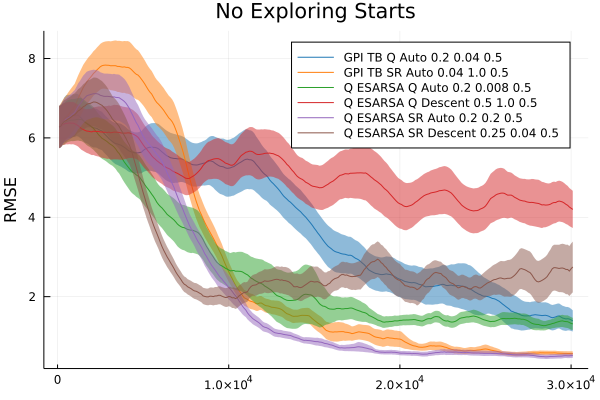

In [686]:
# labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
ylabel = "RMSE"
# title = "SR Demons & Step Size Adaptation vs More Naive Approaches"
title = "No Exploring Starts"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
num_runs = 20
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, grid=true, ribbon = std/sqrt(num_runs), legend=:topright, title=title)

In [687]:
savefig("./plots/experiment2/no_exploring_starts/introspective_vs_non_introspective.png")

In [662]:
#Replicating plot from Experiment 1.
# inds_to_replicate = [1,3,4,8]
inds_to_replicate = [5,6,7,8,9,15,16,17,18,19]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]
@show length(std)
label_subset

length(std) = 20


1×10 Array{String,2}:
 " GPI TB Q 0.5 0.2 0.04"  …  " Q ESARSA SR 0.4 0.2 0.04"

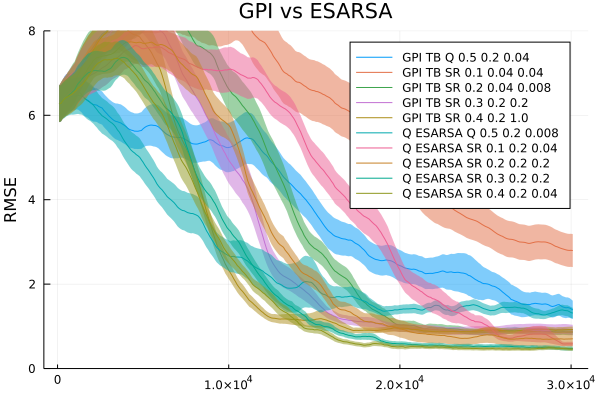

In [663]:
# title = "High vs Low Alpha Init"
title = "GPI vs ESARSA"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,8))

In [646]:
savefig("./plots/experiment2/no_exploring_starts/top_2_algos.png")

In [664]:
for e in diff(ic)["exploration_param"]
    @show e
end

e = 0.1
e = 0.2
e = 0.3
e = 0.4
e = 0.5


In [234]:
inds_to_replicate = [5,6,7]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

4-element Array{Array{Float64,1},1}:
 [1.9181099487646451, 2.0293219787507892, 2.085500089730406, 2.1689908079448075, 2.2267692104209766, 2.2703040034826185, 2.321169368235307, 2.3694877705617365, 2.409609985125206, 2.4335928301580863  …  0.9202426225583491, 0.9094567620515683, 0.8949646678312002, 0.8838595427302247, 0.8768503837289027, 0.8714859484719932, 0.8610139435489085, 0.8538226379306533, 0.8480630649001251, 0.8428000492118735]
 [1.9537244996467416, 2.04516135675983, 2.0638841109262476, 2.088796053561995, 2.128620228840288, 2.1589135181746393, 2.191951729637584, 2.2189263973752857, 2.226499963947538, 2.2381940037899923  …  0.13975068060644436, 0.13572326379560615, 0.1339151639546532, 0.13258783439051863, 0.13557591606790742, 0.13610094537458237, 0.135439184595546, 0.13298289258891952, 0.1366094642283759, 0.13732975941501385]
 [1.9689353649783379, 2.0474267071912893, 2.072770850159802, 2.112071594340513, 2.156473418090883, 2.2077415614232145, 2.241628747920714, 2.2539388901783086

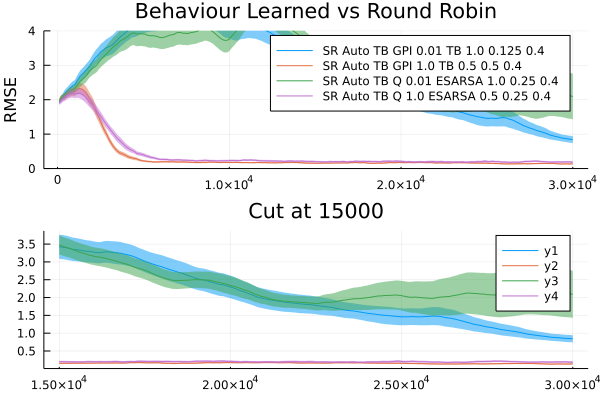

In [235]:
title = "Behaviour Learned vs Round Robin"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
p1 = plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,4))

start_pos = 150
new_x_ticks = collect(step_increment * start_pos:step_increment:num_samples*step_increment)
data_subset_cut = [s[start_pos:end] for s in data_subset]
std_subset_cut = [s[start_pos:end] for s in std[inds_to_replicate]/sqrt(30)]
p2 = plot(new_x_ticks,data_subset_cut, ribbon = std_subset_cut, title="Cut at $(step_increment * start_pos)")

plot(p1,p2, layout = (2,1), figsize=(20,20))


In [203]:
savefig("./plots/experiment2/learned_vs_round_robin.png")

In [705]:
episode_lengths = [GPU.load_results(ic,:episode_length, return_type = "array") for ic in best_per_algo_ics]
visit_orders = [GPU.load_results(ic,:visit_order, return_type = "array") for ic in best_per_algo_ics]

4-element Array{Array{Any,1},1}:
 [[2, 2, 2, 2, 1, 2, 2, 2, 2, 1  …  4, 3, 3, 3, 3, 4, 4, 4, 4, 4], [1, 3, 3, 3, 1, 1, 2, 1, 3, 3  …  3, 2, 1, 3, 3, 4, 4, 4, 4, 3], [4, 2, 2, 2, 1, 2, 2, 2, 2, 2  …  4, 4, 3, 3, 3, 1, 3, 1, 3, 4], [4, 4, 4, 4, 4, 4, 4, 3, 4, 4  …  4, 3, 3, 2, 1, 2, 4, 1, 1, 1], [2, 3, 1, 1, 1, 1, 1, 2, 1, 1  …  4, 3, 1, 3, 4, 3, 2, 3, 3, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1  …  3, 3, 3, 4, 4, 4, 3, 3, 3, 3], [2, 3, 4, 3, 3, 4, 3, 3, 2, 2  …  3, 4, 4, 3, 3, 4, 3, 3, 3, 3], [1, 1, 4, 1, 1, 1, 1, 1, 1, 4  …  3, 4, 2, 3, 3, 4, 3, 3, 3, 4], [2, 3, 4, 4, 4, 4, 4, 4, 4, 4  …  3, 4, 4, 4, 3, 2, 3, 3, 3, 4], [3, 2, 2, 3, 3, 3, 3, 3, 3, 3  …  4, 2, 4, 4, 3, 4, 4, 3, 3, 3]  …  [1, 3, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 2, 3, 3, 3, 3, 4, 3], [2, 4, 2, 2, 2, 2, 2, 2, 2, 2  …  4, 3, 3, 4, 4, 3, 3, 4, 4, 2], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  4, 3, 3, 3, 3, 3, 3, 1, 3, 3], [1, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  2, 4, 4, 4, 3, 3, 1, 1, 3, 3], [2, 2, 2, 4, 1, 2, 2, 2, 2, 2  …  4, 4, 3, 3, 3, 3, 

In [706]:
length(visit_orders[1][7])
length(episode_lengths[1][7])

597

In [707]:
max_lengths = [GPU.get_min_length(arrs)-1 for arrs in episode_lengths]

4-element Array{Int64,1}:
 552
 924
 563
 808

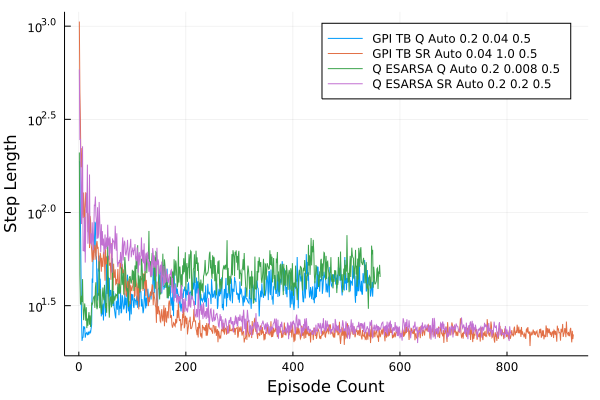

In [710]:
p = plot(xlabel = "Episode Count", ylabel = "Step Length")
for (ind,episode_lengths) in enumerate(episode_lengths)
    l = hcat([epi[1:max_lengths[ind]] for epi in episode_lengths]...)
    plot!(p,mean(l,dims=2), label = labels[ind],yaxis=:log)
end
# p = plot(mean(episode_lengths,dims=2), xlabel="Episode Count", ylabel="Step Length", hline=5.5)
display(p)
savefig("./plots/experiment2/no_exploring_starts/step_length.png")

In [624]:
# include("./plot_utils.jl")
# GPU = GeneralPlotUtils
gvf_labels = ["Distractor" "Constant" "Drifter" "Constant"]

1×4 Array{String,2}:
 "Distractor"  "Constant"  "Drifter"  "Constant"

size(visit_perc) = (4, 552)
size(visit_perc) = 

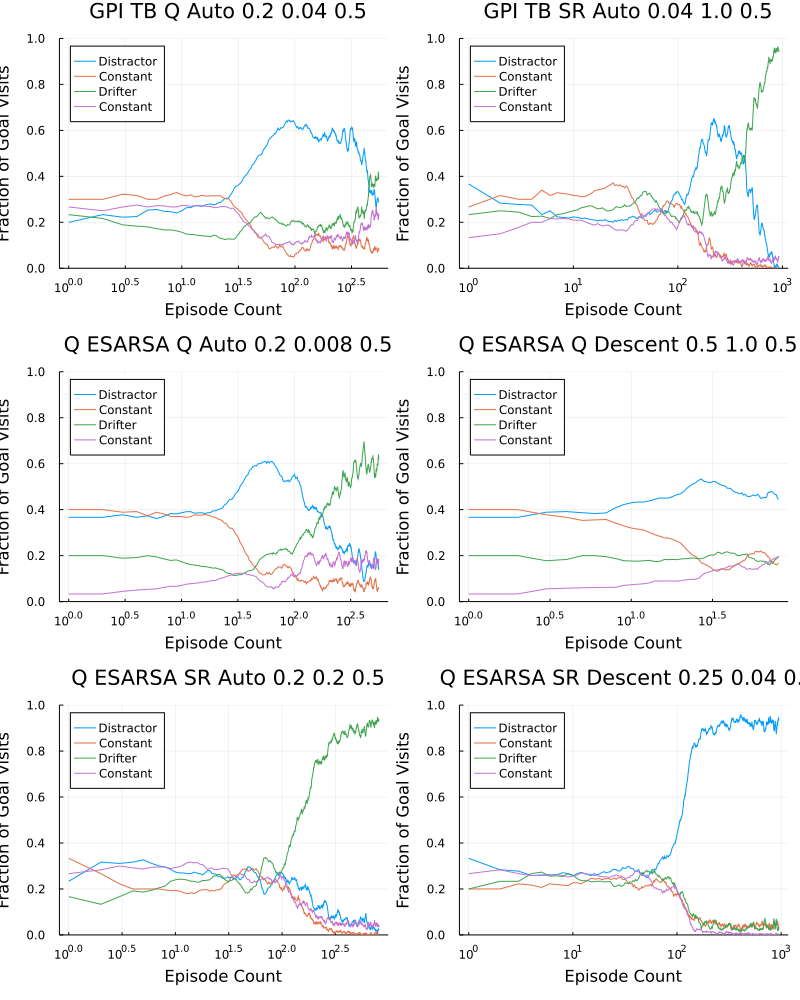

(4, 924)
size(visit_perc) = (4, 563)
size(visit_perc) = (4, 81)
size(visit_perc) = (4, 808)
size(visit_perc) = (4, 951)

length(visit_orders) = 6


In [693]:
ps = []
for i in 1:length(visit_orders)
    visit_perc = GPU.goal_visits_per_episode(visit_orders[i], max_lengths[i])
    @show size(visit_perc)
#     @show size(GPU.smooth(visit_perc, 5))
#     if size(visit_perc)[2] != 0
#         smooth_visit_perc = GPU.smooth(visit_perc, 5)
#     end
    tmp = [GPU.smooth(visit_perc[i,:],20) for i in 1:4] 
    p = plot(tmp, labels = gvf_labels, xlabel="Episode Count", ylabel="Fraction of Goal Visits", ylim=(0.0,1.0), title = labels[i], xaxis=:log, size = (800,1000), legend=:topleft)
    push!(ps,p)
end
println()
@show length(visit_orders)
# plot(ps..., layout = (1,3))
# display(plot(ps...,layout = (2,1)))
# display(plot(ps...))
display(plot(ps..., layout=(3,2)))
savefig("./plots/experiment2/no_exploring_starts/goal_visits_with_not_introspective.png")

maximum(visitation, dims = 2) = [6.0; 9.0; 7.0; 8.0]
maximum(visitation, dims = 2) = [11.0; 12.0; 6.0; 1.0]
maximum(visitation, dims = 2) = [11.0; 8.0; 7.0; 4.0]
maximum(visitation, dims = 2) = [7.0; 10.0; 5.0; 8.0]


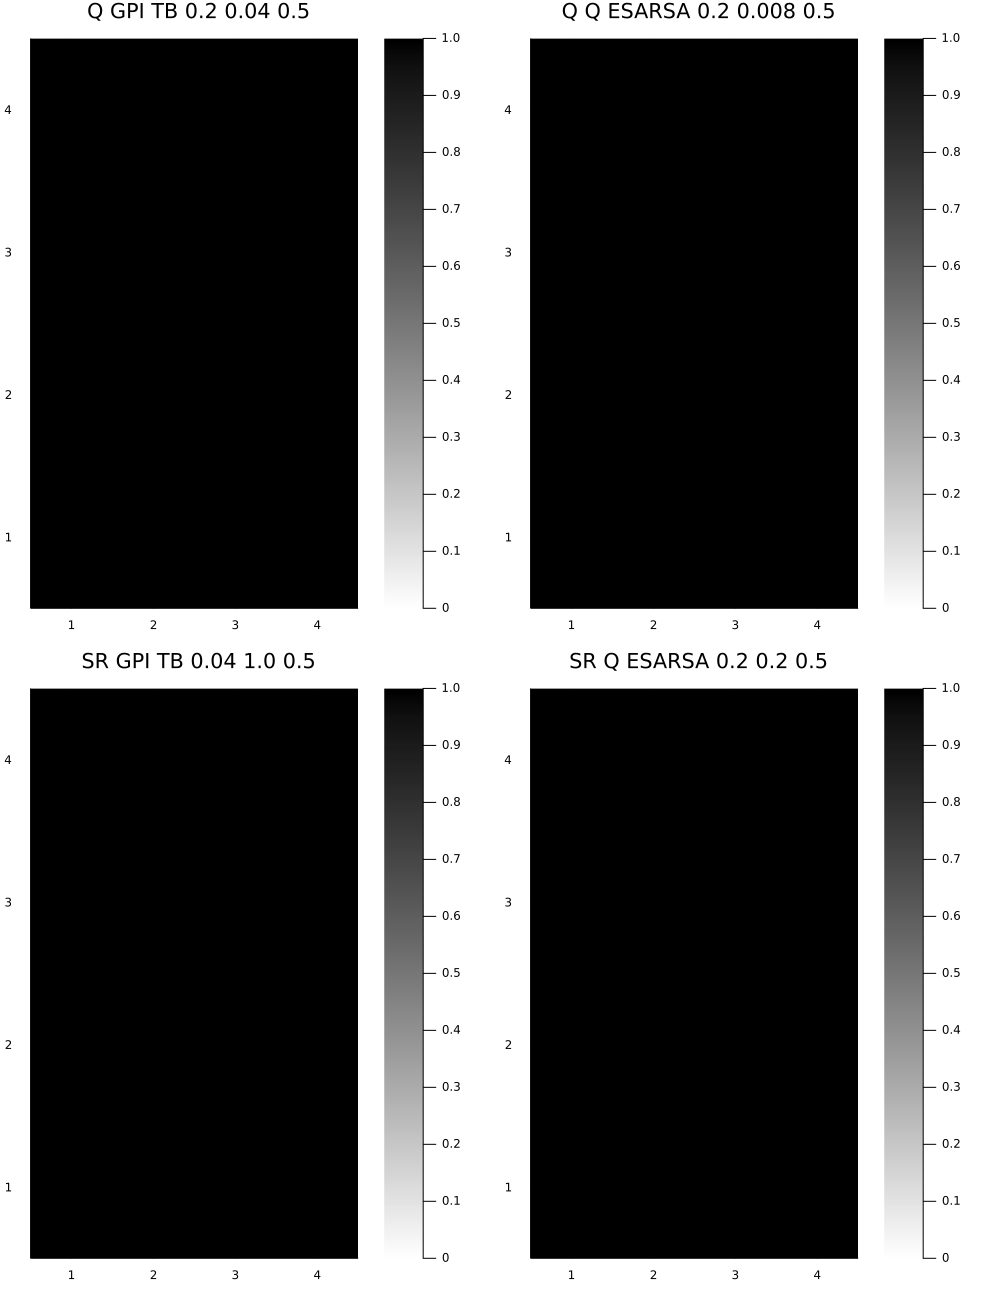

In [628]:
num_gvfs = 4
ps = []
for i in 1:length(visit_orders)
    visitation = zeros(num_gvfs, num_gvfs)
    for run in 1:length(visit_orders[i])
        if length(visit_orders[i][run]) != 0
            first_visit = visit_orders[i][run][1]
#         @show first_visit
            goals = unique(visit_orders[i][run])
#         @show goals
            visitation[first_visit,goals] .+= 1
        end
    end
    @show maximum(visitation,dims=2)
    visitation = visitation ./ vec(maximum(visitation,dims=2))
    push!(ps, heatmap(visitation, title = labels[i], size = (1000,1300), c = :grayC))

end
plot(ps..., layout=(2,2))

In [447]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[2] for ic in best_per_algo_ics]

7-element Array{Array{Float64,2},1}:
 [0.0583830341159143 0.06624647800274217 … 0.025331506725205462 0.024397293962268633; 0.03889287145799879 0.03446226870970493 … 0.014794991119714154 0.01528194549588694; 0.3079138638493579 0.35845048085670994 … 0.9572012726441534 0.9556570344074108; 0.035480788145793404 0.031832843362199124 … 0.015620569934822087 0.01531906940544899]
 [0.05746913114522719 0.060282673279872516 … 0.06374158349618055 0.0663021718397726; 0.04238311595926881 0.04003501526891254 … 0.05524423798772834 0.05587831566970883; 0.3171130805123134 0.3811126732560389 … 0.5272433890472962 0.5564420792754703; 0.04308688359476702 0.04525075299928103 … 0.051676072712286886 0.0507582939644684]
 [0.08544790467545224 0.06717454621790661 … 0.08152217411938359 0.08263905464901689; 0.06831416291205408 0.04849036245726658 … 0.06357413347350213 0.06104375465736899; 0.27642337654811006 0.2944612366188357 … 0.44236477127168583 0.392611894224175; 0.05330815977525475 0.04235849230265052 … 0.06063

In [382]:
GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key), per_gvf=true)[2]

4×40 Array{Float64,2}:
 0.058383   0.0662465  0.0679944  …  0.0257236  0.0253315  0.0243973
 0.0388929  0.0344623  0.0264279     0.0146811  0.014795   0.0152819
 0.307914   0.35845    0.380958      0.934579   0.957201   0.955657
 0.0354808  0.0318328  0.0251053     0.016249   0.0156206  0.0153191

In [420]:
data[1] .== data[3]

4×40 BitArray{2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [446]:
inds_to_replicate

4-element Array{Int64,1}:
 1
 2
 3
 6

In [451]:
ps = []
for ind in inds_to_replicate
    label_subset = labels[:,ind]
    data_subset = data_per_gvf[ind]
    std_subset = std_per_gvf[ind]
    @show size(std_subset)
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    p = plot(xticks,data_subset',label= ["Distractor" "Const" "Drifter" "Const"], ribbon = (std_subset/sqrt(100))', legend=:bottomleft, title=labels[ind], ylims=(0,1.25))
    push!(ps,p)
end

size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)


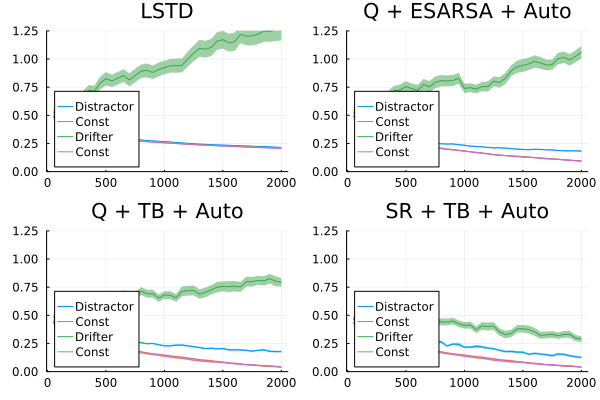

In [452]:
plot(ps..., layout=(2,2))

In [453]:
savefig("./plots/TabTMazeRoundRobin_per_gvf.png")